In [1]:
%matplotlib inline
import matplotlib.pylab as pylab

import pymc as mc

import pandas as pd
import numpy as np
import datetime

In [2]:
import vpfits

# VPfits

The VPfits module contains a class, `VPfit`, that carries out most of the heavy lifting. First we create an instance of this class.

In [3]:
vpfit = vpfits.VPfit()

`VPfit` also contains a function for creating mock absoprtion profiles, `mock_absorption`. Just tell it how many features you wish to include. It returns a dataframe, `clouds`, containing each feature, and an array of wavelength values. It can also plot the profile.

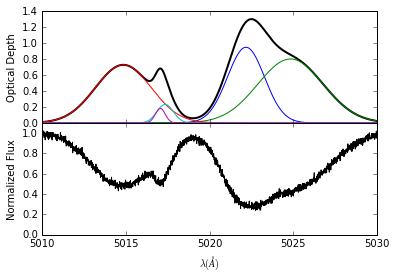

In [12]:
n = 5

clouds, wavelength_array = vpfits.mock_absorption(n=n, plot=True)

The plot shows the profile with added noise, but right now doesn't return this noisy profile, so we recreate it here.

In [13]:
onesigmaerror = 0.02
noise = np.random.normal(0.0, onesigmaerror, len(wavelength_array))
flux_array = vpfit.Absorption(sum(clouds['tau'])) + noise

To fit, call the `fit` method of `VPfit`, providing the wavelength and flux profiles we wish to fit to, as well as `n`, the number of features to fit.

In [14]:
vpfit.fit(wavelength_array, flux_array, n)

 [-----------------100%-----------------] 10000 of 10000 complete in 27.9 sec
Took: 0:00:27.887096  to finish.


Our `VPfit` instance, `vpfit`, now contains the fitted profile components.

We can also query some features of the fit, such as the Maximum A Posteriori (MAP) Bayesian Information Criterion (BIC) and Akaike Information Criterion (AIC).

In [15]:
print vpfit.MAP.BIC
print vpfit.MAP.AIC

-9833.10982262
-9922.72426197


We also have model selection metrics from the MCMC

In [16]:
print vpfit.mcmc.BPIC
print vpfit.mcmc.DIC

-9932.34904688
-9944.12210642


Finally, we can also plot the fit, with residuals. The fitted components and actual components can be directly compared.

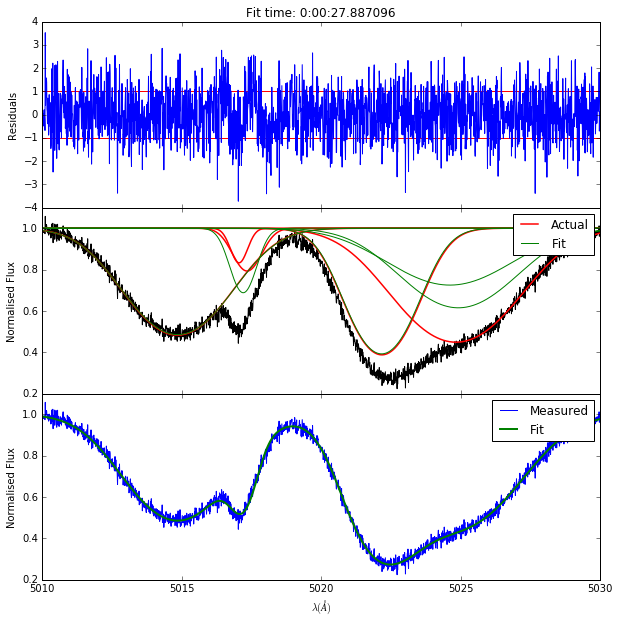

In [17]:
vpfit.plot(wavelength_array, flux_array, clouds, n=n)

# VPfit function

In [4]:
vpfit_1 = vpfits.VPfit()
vpfit_1.fit(wavelength_array, flux_array, 1)

 [-----------------100%-----------------] 10000 of 10000 complete in 6.7 sec
Took: 0:00:06.672398  to finish.


In [11]:
vpfit_2 = vpfits.VPfit()
vpfit_2.fit(wavelength_array, flux_array, 2)

 [-----------------100%-----------------] 10000 of 10000 complete in 12.0 sec
Took: 0:00:12.048723  to finish.


In [12]:
print vpfit_1.mcmc.BPIC
print vpfit_2.mcmc.BPIC

-5131.83335393
-9770.65861094


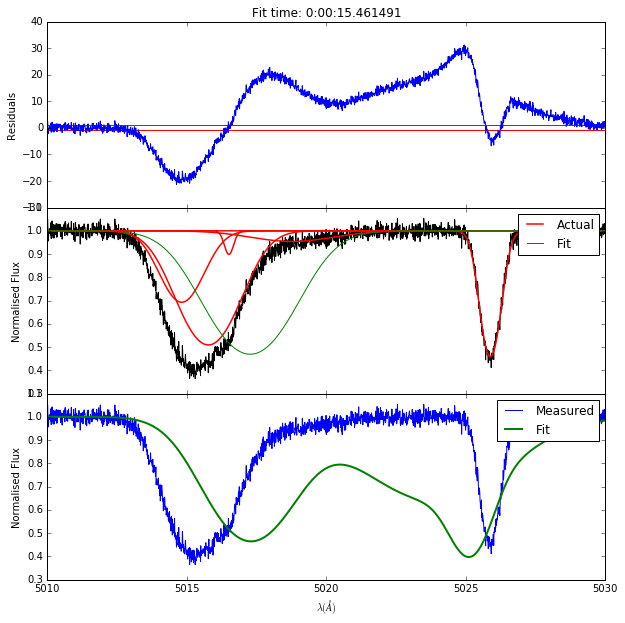

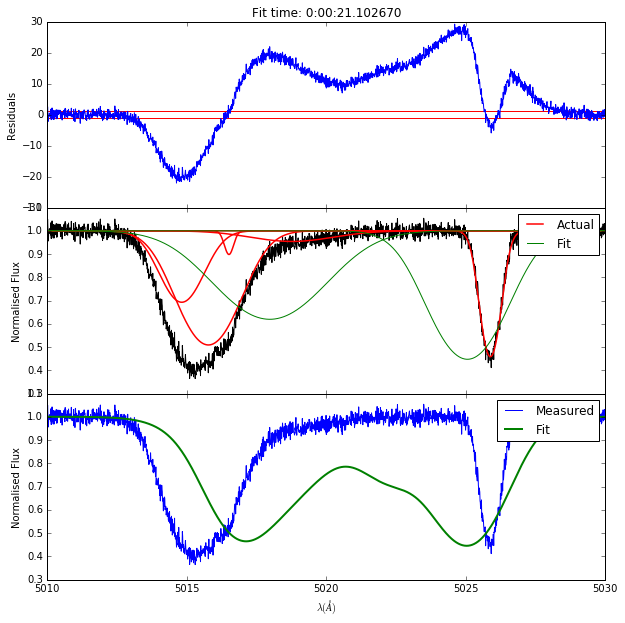

In [27]:
vpfit_1.plot(wavelength_array, flux_array, clouds, n=1)

vpfit_2.plot(wavelength_array, flux_array, clouds, n=2)

## Find best fit

In [5]:
r = 0
n = 1
vpfit_2 = vpfits.VPfit()
vpfit_2.fit(wavelength_array, flux_array, n)

while r < 0.95:
    
    print "n: ", n
    
    vpfit_1 = vpfit_2
    
    vpfit_2 = vpfits.VPfit()
    vpfit_2.fit(wavelength_array, flux_array, n+1)
    
    print vpfit_1.mcmc.BPIC
    print vpfit_2.mcmc.BPIC
    
    print vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    r = vpfit_1.mcmc.BPIC / vpfit_2.mcmc.BPIC
    
    n += 1
    

 [-----------------100%-----------------] 10000 of 10000 complete in 5.8 sec
Took: 0:00:05.820311  to finish.
n:  1
 [-----------------100%-----------------] 10000 of 10000 complete in 11.2 sec
Took: 0:00:11.201679  to finish.
-2364.04853848
-6788.44018914
0.348246205699
n:  2
 [-----------------100%-----------------] 10000 of 10000 complete in 15.5 sec
Took: 0:00:15.461491  to finish.
-6788.44018914
-9191.22093902
0.738578719212
n:  3
 [-----------------100%-----------------] 10000 of 10000 complete in 21.1 sec
Took: 0:00:21.102670  to finish.
-9191.22093902
-8636.17933923
1.0642693462


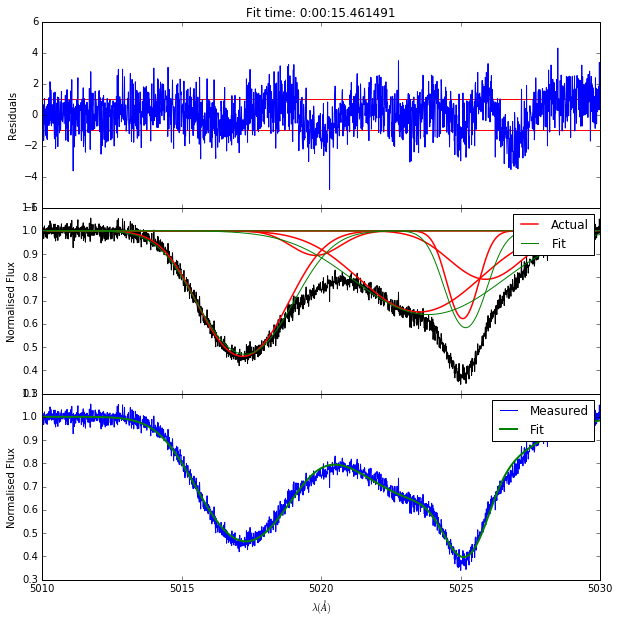

In [6]:
vpfit_1.plot(wavelength_array, flux_array, clouds, n-1)